In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download(["names",'shakespeare',"stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt",])

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [191]:
city = "Bangkok"

In [192]:
f = open("Hotel Reviews DB/"+ city +"/"+ city +"_Hotels_Master.csv", "r")
urls = f.readlines()
f.close()

import re
#pattern = "Reviews-(.*?)-Kuala_Lumpur_Wilayah_Persekutuan.html#"
pattern = "Reviews-(.*?)-"+ city +".html#"
hotels = []
for url in urls:
    hotels.append(re.search(pattern, url).group(1))

print(len(hotels))

20


In [193]:
f = open("Hotel Reviews DB/"+ city +"/overall_rating.csv", "r")
overall_rating = f.readlines()
f.close()

In [194]:
polarity = []
for i in range(1,21):
    f1 = open("Hotel Reviews DB/"+ city +"/Reviews/"+ city +"_reviews_"+ str(i) +".csv", "r")
    f2 = open("Hotel Reviews DB/"+ city +"/Ratings/"+ city +"_ratings_"+ str(i) +".csv", "r")
    reviews = []
    ratings = []
    polscores = []
    reviews = f1.readlines()
    for i in range(0, len(reviews)):
        reviews[i] = reviews[i].rstrip("\n")
    ratings = f2.readlines()
    for i in range(0,len(ratings)):
        ratings[i] = float(ratings[i].rstrip("\n"))
    f1.close()
    f2.close()
    for review in reviews:
        polscores.append(sia.polarity_scores(review)['compound'])
    polarity.append(sum(polscores)/len(polscores))

In [195]:
print(polarity)
for i in range(0,len(overall_rating)):
        overall_rating[i] = float(overall_rating[i].rstrip("\n"))
print(overall_rating)

[0.8312349999999998, 0.8957919999999997, 0.9582103448275868, 0.9310499999999999, 0.904455, 0.8195950000000002, 0.8996536842105265, 0.8542029999999996, 0.8453399999999999, 0.9385710000000002, 0.8139399999999999, 0.8671973333333332, 0.7571080000000001, 0.9356397959183671, 0.8951230000000002, 0.8978541666666666, 0.7416399999999999, 0.7714370000000002, 0.8479110000000002, 0.8202747368421053]
[4.5, 4.5, 5.0, 5.0, 5.0, 4.5, 5.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.0, 4.5, 4.5, 4.5, 4.0, 4.0, 4.5]


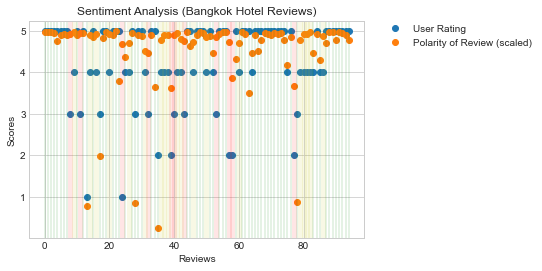

In [196]:
import numpy as np

diff = np.array([2.5*(i+1) for i in polscores]) - np.array(ratings)

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(ratings, 'o', label="User Rating")
plt.plot([2.5*(i+1) for i in polscores], 'o', label="Polarity of Review (scaled)")
#plt.plot(diff, 'o', label="Difference")
plt.xlabel("Reviews")
plt.ylabel("Scores")
plt.title("Sentiment Analysis (" + city +" Hotel Reviews)" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for i in range(0, len(ratings)):
    if (abs(diff[i]>1)): plt.axvline(i, color='r',linewidth=5,alpha=0.1)
    elif (abs(diff[i]>0.5)): plt.axvline(i, color='y',linewidth=5,alpha=0.1)
    else: plt.axvline(i, color='g',linewidth=2,alpha=0.1)

plt.show()

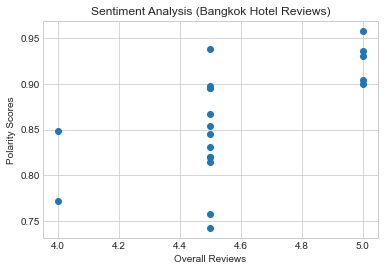

In [197]:
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(overall_rating,polarity,'o')
#plt.plot([2.5*(i+1) for i in polscores], 'o', label="Polarity of Review (scaled)")
#plt.plot(diff, 'o', label="Difference")
plt.xlabel("Overall Reviews")
plt.ylabel("Polarity Scores")
plt.title("Sentiment Analysis (" + city +" Hotel Reviews)" )

plt.show()


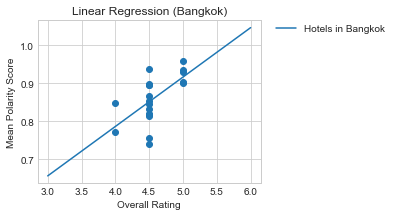

[[1.         0.61526878]
 [0.61526878 1.        ]]


In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = np.array(overall_rating).reshape(-1, 1)

# y = a*x + b with noise
y = np.array(polarity).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(3, 6, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new, label="Hotels in "+city)

ax.set_xlabel('Overall Rating')
ax.set_ylabel('Mean Polarity Score')

ax.axis('tight')

plt.title("Linear Regression (" + city +")")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

#for i in range(0,len(overall_rating)):
#        overall_rating[i] = float(overall_rating[i].rstrip("\n"))
#print(overall_rating)
r = np.corrcoef(np.array(overall_rating), np.array(polarity))
print(r)


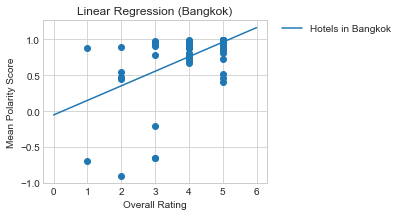

[[1.         0.54376501]
 [0.54376501 1.        ]]


In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = np.array(ratings).reshape(-1, 1)

# y = a*x + b with noise
y = np.array(polscores).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 6, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new, label="Hotels in "+city)

ax.set_xlabel('Overall Rating')
ax.set_ylabel('Mean Polarity Score')

ax.axis('tight')

plt.title("Linear Regression (" + city +")")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

#for i in range(0,len(overall_rating)):
#        overall_rating[i] = float(overall_rating[i].rstrip("\n"))
#print(overall_rating)
r = np.corrcoef(np.array(ratings), np.array(polscores))
print(r)


In [51]:
import csv
# opening the csv file in 'w+' mode
filename = "VizData_"+ city +".csv"
file = open(filename, 'w', newline ='\n')
  
# writing the data into the file
with file:    
    write = csv.writer(file, dialect='excel')
    for i in range(0,len(hotels)):
        write.writerow([hotels[i].replace("_"," "), round(polarity[i], 5), float(overall_rating[i].rstrip("\n"))])
file.close()